In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
data.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767
Pregnancies,6.000,1.000,8.000,1.000,0.000,5.000,3.000,10.000,2.000,8.000,4.000,10.000,10.000,1.000,5.000,7.000,0.000,7.000,1.000,1.000,3.000,8.000,7.000,9.000,11.000,10.000,7.000,1.000,13.000,5.000,5.000,3.000,3.000,6.000,10.000,4.000,11.00,9.000,2.000,4.00,3.000,7.000,7.000,9.000,7.000,0.000,1.000,2.000,7.000,7.000,...,1.000,5.000,4.000,1.000,1.000,5.000,1.000,4.000,1.000,0.000,2.000,2.000,3.000,8.000,2.000,2.000,2.00,4.000,0.000,8.0,2.000,1.000,11.000,3.0,1.000,9.000,13.000,12.000,1.000,1.000,3.000,6.000,4.000,1.000,3.000,0.000,8.000,1.000,7.000,0.000,1.000,6.000,2.000,9.000,9.000,10.000,2.00,5.000,1.000,1.000
Glucose,148.000,85.000,183.000,89.000,137.000,116.000,78.000,115.000,197.000,125.000,110.000,168.000,139.000,189.000,166.000,100.000,118.000,107.000,103.000,115.000,126.000,99.000,196.000,119.000,143.000,125.000,147.000,97.000,145.000,117.000,109.000,158.000,88.000,92.000,122.000,103.000,138.00,102.000,90.000,111.00,180.000,133.000,106.000,171.000,159.000,180.000,146.000,71.000,103.000,105.000,...,108.000,97.000,83.000,114.000,149.000,117.000,111.000,112.000,116.000,141.000,175.000,92.000,130.000,120.000,174.000,106.000,105.00,95.000,126.000,65.0,99.000,102.000,120.000,102.0,109.000,140.000,153.000,100.000,147.000,81.000,187.000,162.000,136.000,121.000,108.000,181.000,154.000,128.000,137.000,123.000,106.000,190.000,88.000,170.000,89.000,101.000,122.00,121.000,126.000,93.000
BloodPressure,72.000,66.000,64.000,66.000,40.000,74.000,50.000,0.000,70.000,96.000,92.000,74.000,80.000,60.000,72.000,0.000,84.000,74.000,30.000,70.000,88.000,84.000,90.000,80.000,94.000,70.000,76.000,66.000,82.000,92.000,75.000,76.000,58.000,92.000,78.000,60.000,76.00,76.000,68.000,72.00,64.000,84.000,92.000,110.000,64.000,66.000,56.000,70.000,66.000,0.000,...,60.000,76.000,86.000,66.000,68.000,86.000,94.000,78.000,78.000,84.000,88.000,52.000,78.000,86.000,88.000,56.000,75.00,60.000,86.000,72.0,60.000,74.000,80.000,44.0,58.000,94.000,88.000,84.000,94.000,74.000,70.000,62.000,70.000,78.000,62.000,88.000,78.000,88.000,90.000,72.000,76.000,92.000,58.000,74.000,62.000,76.000,70.00,72.000,60.000,70.000
SkinThickness,35.000,29.000,0.000,23.000,35.000,0.000,32.000,0.000,45.000,0.000,0.000,0.000,0.000,23.000,19.000,0.000,47.000,0.000,38.000,30.000,41.000,0.000,0.000,35.000,33.000,26.000,0.000,15.000,19.000,0.000,26.000,36.000,11.000,0.000,31.000,33.000,0.00,37.000,42.000,47.00,25.000,0.000,18.000,24.000,0.000,39.000,0.000,27.000,32.000,0.000,...,46.000,27.000,19.000,36.000,29.000,30.000,0.000,40.000,29.000,26.000,0.000,0.000,23.000,0.000,37.000,27.000,0.00,32.000,27.000,23.0,17.000,0.000,37.000,20.0,18.000,0.000,37.000,33.000,41.000,41.000,22.000,0.000,0.000,39.000,24.000,44.000,32.000,39.000,41.000,0.000,0.000,0.000,26.000,31.000,0.000,48.000,27.00,23.000,0.000,31.000
Insulin,0.000,0.000,0.000,94.000,168.000,0.000,88.000,0.000,543.000,0.000,0.000,0.000,0.000,846.000,175.000,0.000,230.000,0.000,83.000,96.000,235.000,0.000,0.000,0.000,146.000,115.000,0.000,140.000,110.000,0.000,0.000,245.000,54.000,0.000,0.000,192.000,0.00,0.000,0.000,207.00,70.000,0.000,0.000,240.000,0.000,0.000,0.000,0.000,0.000,0.000,...,178.000,0.000,0.000,200.000,127.000,105.000,0.000,0.000,180.000,0.000,0.000,0.000,79.000,0.000,120.000,165.000,0.00,0.000,120.000,0.0,160.000,0.000,150.000,94.0,116.000,0.000,140.000,105.000,0.000,57.000,200.000,0.000,0.000,74.000,0.000,510.000,0.000,110.000,0.000,0.000,0.000,0.000,16.000,0.000,0.000,180.000,0.00,112.000,0.000,0.000
BMI,33.600,26.600,23.300,28.100,43.100,25.600,31.000,35.300,30.500,0.000,37.600,38.000,27.100,30.100,25.800,30.000,45.800,29.600,43.300,34.600,39.300,35.400,39.800,29.000,36.600,31.100,3

In [ ]:
df_check=data.isnull().sum()
df_check

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

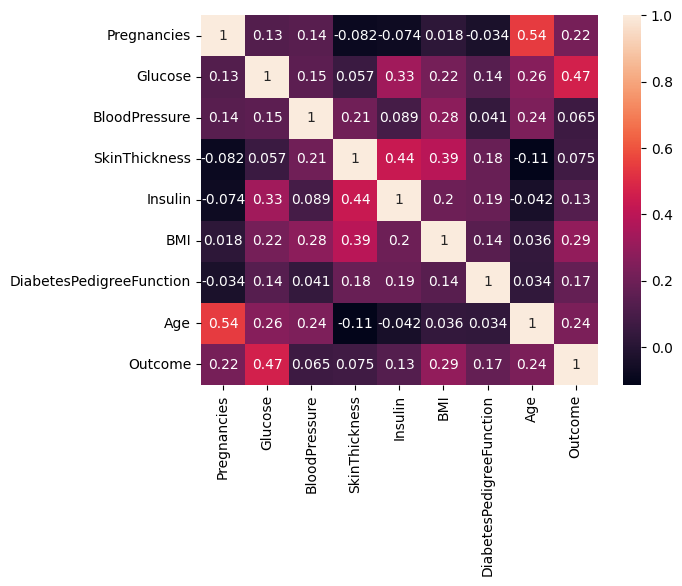

In [ ]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
x=data.iloc[:,1:8]
x

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [ ]:
x.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33


In [ ]:
y=data.Outcome.values.reshape(-1,1)
y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
xtrain

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
663,145,80,46,130,37.9,0.637,40
712,129,62,36,0,41.2,0.441,38
161,102,74,40,105,37.2,0.204,45
509,120,78,0,0,25.0,0.409,64
305,120,76,37,105,39.7,0.215,29
...,...,...,...,...,...,...,...
645,157,74,35,440,39.4,0.134,30
715,187,50,33,392,33.9,0.826,34
72,126,90,0,0,43.4,0.583,42
235,171,72,0,0,43.6,0.479,26


In [ ]:
xtest

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
285,136,74,26,135,26.0,0.647,51
101,151,60,0,0,26.1,0.179,22
581,109,60,27,0,25.0,0.206,27
352,61,82,28,0,34.4,0.243,46
726,116,78,29,180,36.1,0.496,25
...,...,...,...,...,...,...,...
563,99,60,19,54,26.9,0.497,32
318,115,66,39,140,38.1,0.150,28
154,188,78,0,0,47.9,0.137,43
684,136,82,0,0,0.0,0.640,69


In [ ]:
ytrain

array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
ytest

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
    

In [ ]:
xtest

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
285,136,74,26,135,26.0,0.647,51
101,151,60,0,0,26.1,0.179,22
581,109,60,27,0,25.0,0.206,27
352,61,82,28,0,34.4,0.243,46
726,116,78,29,180,36.1,0.496,25
...,...,...,...,...,...,...,...
563,99,60,19,54,26.9,0.497,32
318,115,66,39,140,38.1,0.150,28
154,188,78,0,0,47.9,0.137,43
684,136,82,0,0,0.0,0.640,69


In [ ]:
# decision tree
# gini ( default ) or entropy
destreclas=DecisionTreeClassifier(criterion='gini',max_depth=3)
destreclas=destreclas.fit(xtrain,ytrain)
ypred=destreclas.predict(xtest)

In [ ]:
ypred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
metrics.accuracy_score(ytest,ypred)

0.7857142857142857

In [ ]:
from sklearn import tree

In [ ]:
text=tree.export_text(destreclas)
print(text)
# feature 0- glucose, 4 bmi, 6 age

|--- feature_0 <= 127.50
|   |--- feature_6 <= 28.50
|   |   |--- feature_4 <= 45.40
|   |   |   |--- class: 0
|   |   |--- feature_4 >  45.40
|   |   |   |--- class: 1
|   |--- feature_6 >  28.50
|   |   |--- feature_0 <= 99.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  99.50
|   |   |   |--- class: 0
|--- feature_0 >  127.50
|   |--- feature_4 <= 29.95
|   |   |--- feature_0 <= 145.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  145.50
|   |   |   |--- class: 1
|   |--- feature_4 >  29.95
|   |   |--- feature_0 <= 154.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  154.50
|   |   |   |--- class: 1



In [ ]:
with open('Description_tree.log',"w") as fout:
  fout.write(text)

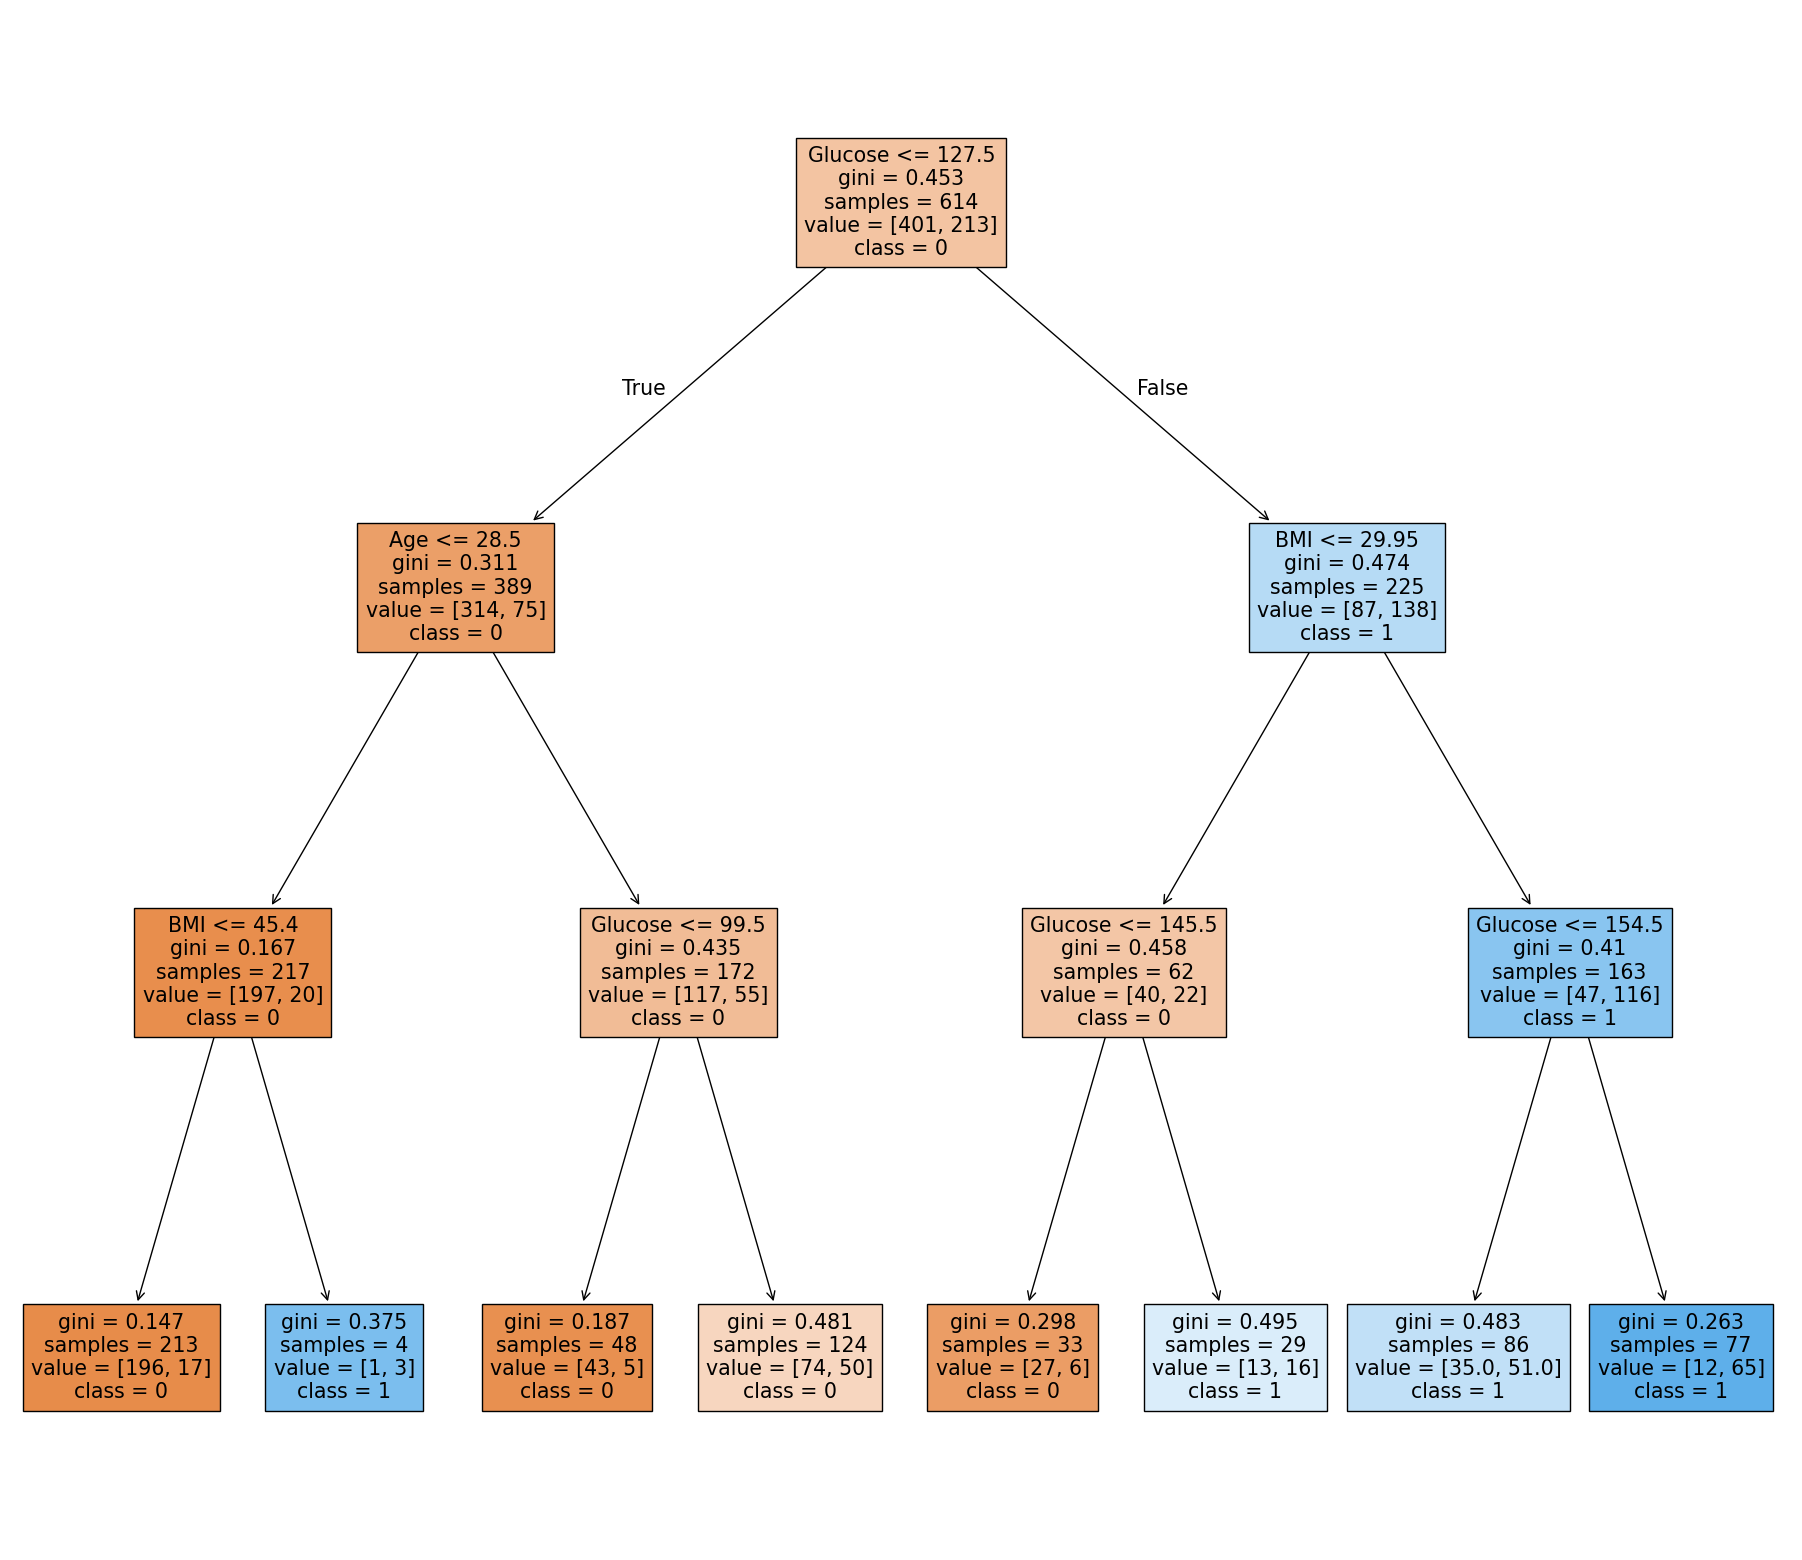

In [ ]:
# display
feature=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
target=['0','1']
fig=plt.figure(figsize=(23,20))
plot=tree.plot_tree(destreclas,feature_names=feature,class_names=target,filled=True)
fig.savefig('ginitree.png')